In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/car_price_prediction_.csv


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"/kaggle/input/car-price-prediction/car_price_prediction_.csv")

In [4]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [5]:
df.shape

(2500, 10)

In [6]:
df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [8]:
df.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


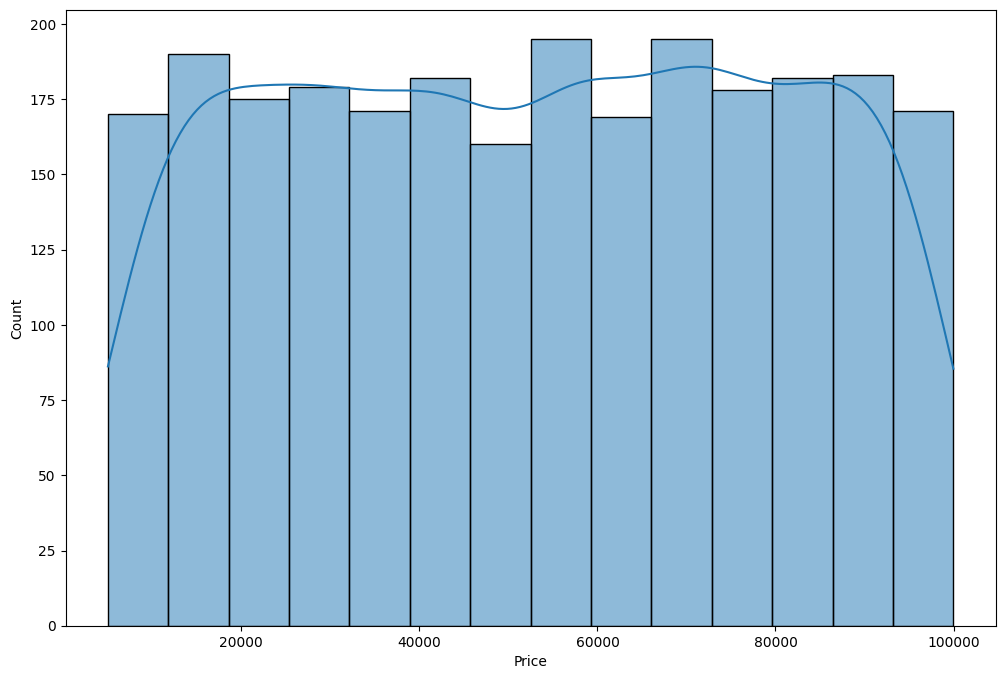

In [9]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="Price", kde=True)
plt.show()

In [10]:
df["Brand"].value_counts()

Brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Tesla       348
Ford        347
Name: count, dtype: int64

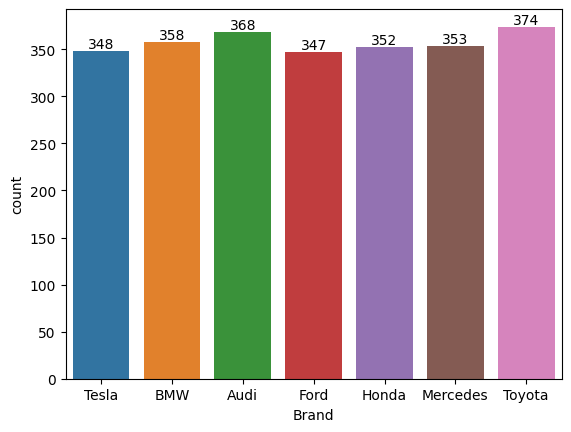

In [11]:
ax = sns.countplot(x="Brand",data=df)
ax.bar_label(ax.containers[0])
plt.show()

In [12]:
df["Year"].value_counts()

Year
2020    122
2016    118
2003    118
2022    112
2021    112
2012    111
2007    110
2002    110
2001    109
2008    109
2014    109
2018    106
2023    103
2005    103
2019    103
2011    101
2004    100
2017     97
2010     95
2013     95
2000     93
2009     90
2015     88
2006     86
Name: count, dtype: int64

In [13]:
df["Engine Size"].value_counts()

Engine Size
1.3    69
3.9    65
3.0    61
1.8    60
2.7    60
5.1    57
4.0    57
2.2    56
3.1    56
4.8    56
4.5    56
4.4    56
1.4    54
2.1    54
5.7    53
5.0    53
2.6    53
3.4    52
2.9    52
5.8    52
3.7    51
2.0    51
5.4    51
2.4    51
3.2    50
3.8    50
4.7    50
1.9    49
5.2    49
4.2    49
2.5    48
1.7    48
1.2    48
2.8    46
2.3    46
3.3    45
4.1    45
5.5    44
4.3    44
5.3    44
1.6    43
1.5    43
5.9    42
1.1    42
3.5    41
3.6    40
5.6    39
4.6    38
4.9    33
6.0    25
1.0    23
Name: count, dtype: int64

In [14]:
df["Fuel Type"].sort_values()

2499    Diesel
2003    Diesel
767     Diesel
768     Diesel
1999    Diesel
         ...  
844     Petrol
842     Petrol
841     Petrol
1930    Petrol
0       Petrol
Name: Fuel Type, Length: 2500, dtype: object

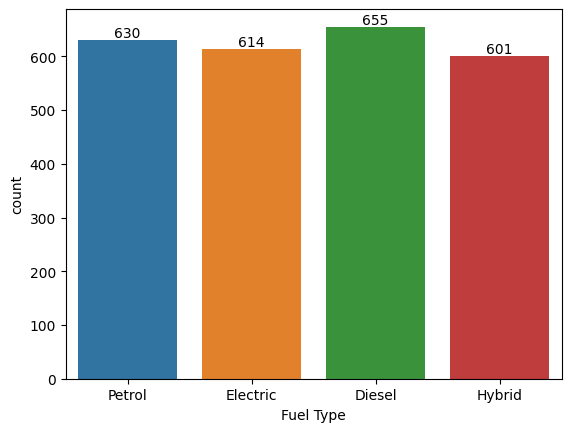

In [15]:
ax = sns.countplot(data=df, x="Fuel Type")
ax.bar_label(ax.containers[0])
plt.show()

In [16]:
df["Transmission"].value_counts()

Transmission
Manual       1308
Automatic    1192
Name: count, dtype: int64

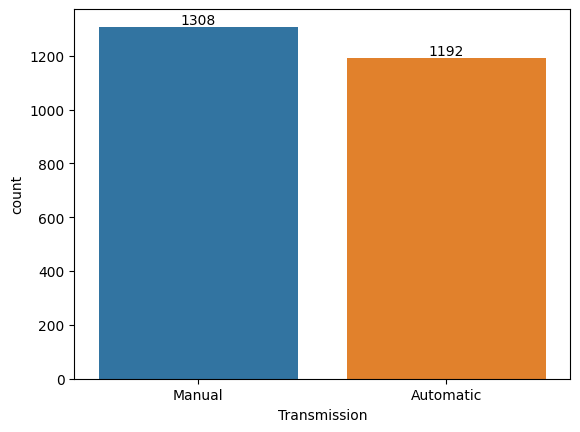

In [17]:
ax = sns.countplot(data = df, x="Transmission")
ax.bar_label(ax.containers[0])
plt.show()

In [18]:
df["Condition"].value_counts()

Condition
Used        855
Like New    836
New         809
Name: count, dtype: int64

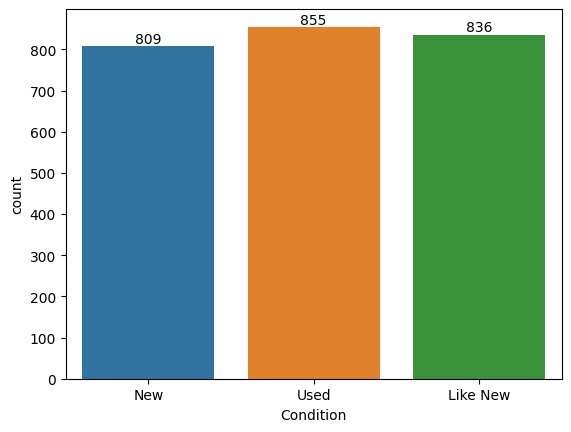

In [19]:
ax = sns.countplot(data=df, x = "Condition")
ax.bar_label(ax.containers[0])
plt.show()

In [20]:
df["Model"].value_counts()

Model
Fiesta      103
Corolla     103
A3           98
A4           96
CR-V         95
Q7           95
5 Series     93
Model X      93
Prius        93
3 Series     93
X3           92
GLA          92
C-Class      92
Camry        90
E-Class      89
Model Y      89
Fit          89
RAV4         88
Accord       88
Model 3      87
Explorer     86
Focus        81
GLC          80
Civic        80
X5           80
Model S      79
Q5           79
Mustang      77
Name: count, dtype: int64

In [21]:
df.drop(columns = ["Car ID"],inplace = True )

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
le = LabelEncoder()
df["Brand"] = le.fit_transform(df["Brand"])

In [24]:
le = LabelEncoder()
df["Fuel Type"] = le.fit_transform(df["Fuel Type"])

In [25]:
le = LabelEncoder()
df["Transmission"] = le.fit_transform(df["Transmission"])

In [26]:
le = LabelEncoder()
df["Condition"] = le.fit_transform(df["Condition"])

In [27]:
le = LabelEncoder()
df["Model"] = le.fit_transform(df["Model"])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         2500 non-null   int64  
 1   Year          2500 non-null   int64  
 2   Engine Size   2500 non-null   float64
 3   Fuel Type     2500 non-null   int64  
 4   Transmission  2500 non-null   int64  
 5   Mileage       2500 non-null   int64  
 6   Condition     2500 non-null   int64  
 7   Price         2500 non-null   float64
 8   Model         2500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 175.9 KB


In [29]:
x = df.drop("Price", axis=1)
y = df["Price"]

In [30]:
scaler_df = StandardScaler()
x = pd.DataFrame(scaler_df. fit_transform(x),columns = x.columns)

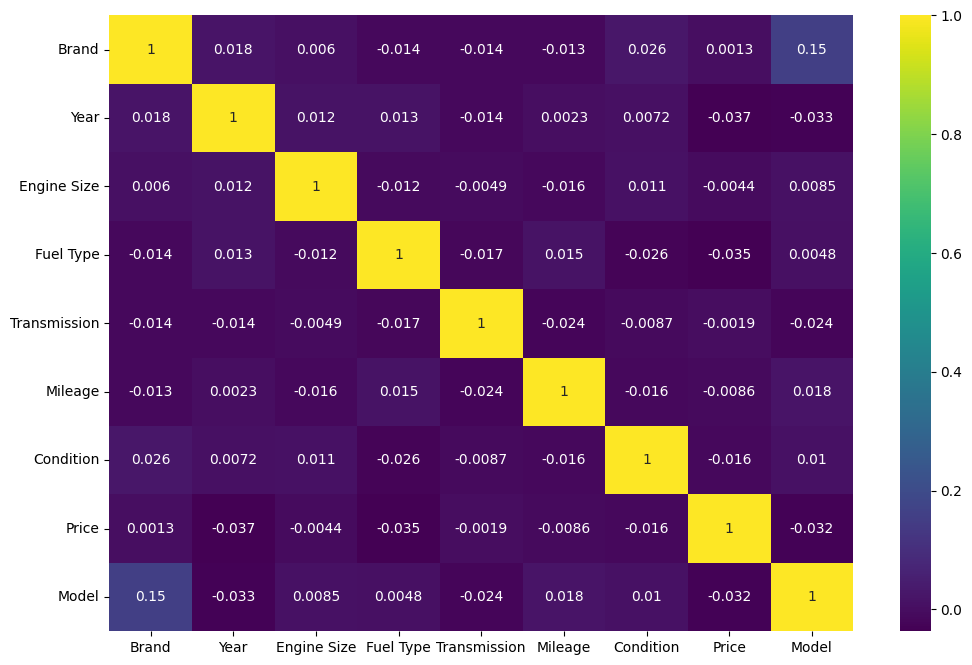

In [31]:
plt.figure(figsize = (12,8))
sns.heatmap(data = df.corr(),annot = True, cmap='viridis')
plt.show()

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 30)

In [33]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [34]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [35]:
dt =DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100, dt.score(x_train,y_train)*100

(-102.73351955498113, 100.0)

In [36]:
mean_squared_error(y_test ,dt.predict(x_test)),mean_absolute_error(y_test ,dt.predict(x_test))

(1556102549.0413537, 32243.691179999998)

In [37]:
x_test

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
679,1.484284,1.340886,-0.255097,-0.426771,-1.047528,0.151204,1.206712,1.078942
1062,-1.485868,-1.234110,-0.744004,-1.311453,0.954628,-1.639795,-1.225194,1.325715
2114,0.989259,-1.663276,-1.232910,0.457911,-1.047528,0.905017,-0.009241,0.462009
524,-0.000792,0.625610,0.233809,1.342593,0.954628,-0.498392,1.206712,-1.142017
1636,-1.485868,0.196444,-0.255097,-0.426771,-1.047528,0.833574,-1.225194,1.325715
...,...,...,...,...,...,...,...,...
552,-1.485868,-1.663276,0.652872,-1.311453,-1.047528,-1.436865,-0.009241,-1.265404
490,0.494233,0.768665,-1.442442,1.342593,-1.047528,1.080041,1.206712,0.215236
1883,0.494233,-0.947999,-1.512286,1.342593,-1.047528,-0.198628,-0.009241,-0.401697
20,0.494233,1.054776,0.303653,1.342593,-1.047528,0.487565,1.206712,-1.018630


In [38]:
dt.predict([[1.484284,1.340886,-0.255097,-0.426771,-1.047528,0.151204,1.206712,1.078942]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([81568.35])

In [39]:
y_test.head()

679     70016.62
1062    94827.57
2114    21792.22
524     10986.59
1636    67863.46
Name: Price, dtype: float64

In [40]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,5,2016,2.3,3,1,114832,1,26613.92,19
1,1,2018,4.4,1,1,143190,2,14679.61,1
2,0,2013,4.5,1,1,181601,1,44402.61,3
3,5,2011,4.1,0,0,68682,1,86374.33,20
4,2,2009,2.6,0,1,223009,0,73577.10,21
